In [37]:
h = 0.0001

# inputs
a = 2.0
b = -3.0
c = 10.0

d1 = a*b +c
c+=h
d2= a*b + c

print('d1', d1)
print('d2', d2)
print ('slope' , (d2-d1)/h)


d1 4.0
d2 4.0001
slope 0.9999999999976694


In [39]:
h = 0.0001

# inputs
a = 2.0
b = -3.0
c = 10.0
d = a*b +c
print(d)

4.0


In [163]:
class Value:
    def __init__(self,data, _children=(),_op='', _label=''):
        self.data = data
        self._prev = set(_children)
        self._op = _op
        self.grad = 0
        self.label = _label
        
    def __repr__(self):
        return f"Value(data={self.data, self._prev, self.label})"
    def __add__(self, other):
        out = Value(self.data + other.data,(self, other),'+')
        return out
    def __mul__(self,other):
        out = Value(self.data * other.data, (self,other),'*')
        return out

In [164]:
from graphviz import Digraph

def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
                # print( f"Value(data={v})")
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root, format='svg', rankdir='LR'):
    """
    format: png | svg | ...
    rankdir: TB (top to bottom graph) | LR (left to right)
    """
    assert rankdir in ['LR', 'TB']
    nodes, edges = trace(root)
    dot = Digraph(format=format, graph_attr={'rankdir': rankdir}) #, node_attr={'rankdir': 'TB'})
    
    for n in nodes:
        dot.node(name=str(id(n)), label = "{ %s| data %.4f | grad %.4f }" % (n.label,n.data, n.grad), shape='record')
        if n._op:
            dot.node(name=str(id(n)) + n._op, label=n._op)
            dot.edge(str(id(n)) + n._op, str(id(n)))
    
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    
    return dot

In [170]:
a = Value(2.0,(),'','a')
b = Value(-3.0,(),'','b')
c = Value(10.0,(),'','c')

# a + b
e = a * b ; e.label ='e'
d = e +c ; d.label = 'd'


f = Value(-2.0,(),'','f')
L = d*f ; L.label = 'L'

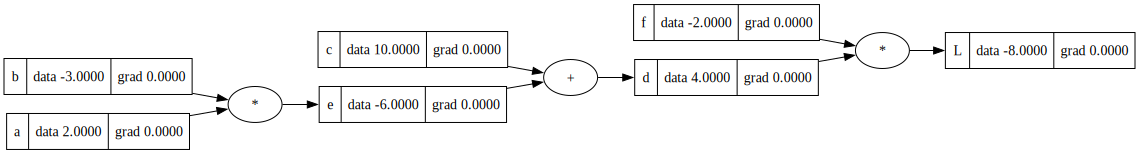

In [171]:
draw_dot(L)